In [14]:
import librosa
import numpy as np
import os
import glob
import pandas as pd
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
def features(path):
  y, sr=librosa.load(path,sr=16000)
  mfccs=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20)
  mfccs_mean=np.mean(mfccs,axis=1)
  cen=np.mean(librosa.feature.spectral_centroid(y=y,sr=sr))
  band=np.mean(librosa.feature.spectral_bandwidth(y=y,sr=sr))
  rolloff=np.mean(librosa.feature.spectral_rolloff(y=y,sr=sr))
  contrast=np.mean(librosa.feature.spectral_contrast(y=y,sr=sr))
  chroma=np.mean(librosa.feature.chroma_stft(y=y,sr=sr))
  tonnetz=np.mean(librosa.feature.tonnetz(y=y,sr=sr))
  zero=np.mean(librosa.feature.zero_crossing_rate(y))
  rmse=np.mean(librosa.feature.rms(y=y))
  f=np.hstack([mfccs_mean,cen,band,rolloff,contrast,chroma,tonnetz,zero,rmse])
  return f

In [17]:
from google.colab import drive
import zipfile
import os
drive.mount('/content/drive')

def ex(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, "r") as zf:
        zf.extractall(extract_path)
        print(os.listdir(extract_path))

ex("/content/drive/MyDrive/real.zip", "/content/")
ex("/content/drive/MyDrive/fake.zip", "/content/")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['.config', 'real', 'fake', 'drive', 'sample_data']
['.config', 'real', 'fake', 'drive', 'sample_data']


In [18]:
real_files=glob.glob("/content/real/*.wav")
fake_files=glob.glob("/content/fake/*.wav")
X,y=[],[]
for file in real_files:
  X.append(features(file))
  y.append(1)
for file in fake_files:
  X.append(features(file))
  y.append(0)
X

/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=511
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=501
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=437
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=502
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=416
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=510
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWa

KeyboardInterrupt: 

In [3]:
len(X)

0

In [8]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.DataFrame(X)
df['label'] = y

# Save to Drive
csv_path = "/content/drive/MyDrive/audio_features_wav2vec24.csv"
df.to_csv(csv_path, index=False)
print(f"Features saved to: {csv_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Features saved to: /content/drive/MyDrive/audio_features_wav2vec24.csv


In [80]:
from google.colab import drive
drive.mount('/content/drive')
csv_path = "/content/drive/MyDrive/extracted_audio_features.csv"

df = pd.read_csv(csv_path)
X = df.drop('label', axis=1).values
y = df['label'].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of X: (22859, 48)
Shape of y: (22859,)


In [81]:
X=pd.DataFrame(X)

In [82]:
X.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
22854,False
22855,False
22856,False
22857,False


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.iloc[0:2]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
11963,-198.583389,117.207947,-17.144159,34.902199,2.961079,26.858078,6.318829,-10.895095,-0.296312,0.333561,...,1.772066,1.471651,1363.338265,1528.483531,2974.639423,18.591839,0.537589,-0.001230,0.057046,0.082375
8136,-169.959641,110.706268,3.363062,45.557640,-2.609173,17.610819,0.160151,4.086497,2.775040,2.984776,...,0.085860,0.441674,1375.591729,1567.450076,3007.461939,16.917519,0.521442,-0.000587,0.070212,0.090960


In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [87]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale=MinMaxScaler()
X_train=minmax_scale.fit_transform(X_train)
X_test=minmax_scale.transform(X_test)

In [88]:
X_train[11963]

array([0.57396405, 0.61199842, 0.53682732, 0.50479981, 0.67872106,
       0.61267037, 0.53312425, 0.51583125, 0.55410938, 0.45950925,
       0.45887912, 0.66968624, 0.50572356, 0.72877711, 0.43336964,
       0.46175546, 0.67105242, 0.5946656 , 0.57471663, 0.73772701,
       0.428237  , 0.53897346, 0.6217372 , 0.38010576, 0.62607494,
       0.34567829, 0.50885308, 0.49624015, 0.43597726, 0.5277002 ,
       0.4303665 , 0.39455767, 0.31408381, 0.3679126 , 0.38263618,
       0.07199909, 0.49913477, 0.3630319 , 0.5343927 , 0.56621215,
       0.34055897, 0.28949154, 0.31856697, 0.36900369, 0.2172021 ,
       0.3849011 , 0.30675333, 0.20704498])

In [67]:
df_eda = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])
df_eda['Label'] = y_train

print("Data Overview:")
print(df_eda.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18287 entries, 0 to 18286
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_0   18287 non-null  float64
 1   Feature_1   18287 non-null  float64
 2   Feature_2   18287 non-null  float64
 3   Feature_3   18287 non-null  float64
 4   Feature_4   18287 non-null  float64
 5   Feature_5   18287 non-null  float64
 6   Feature_6   18287 non-null  float64
 7   Feature_7   18287 non-null  float64
 8   Feature_8   18287 non-null  float64
 9   Feature_9   18287 non-null  float64
 10  Feature_10  18287 non-null  float64
 11  Feature_11  18287 non-null  float64
 12  Feature_12  18287 non-null  float64
 13  Feature_13  18287 non-null  float64
 14  Feature_14  18287 non-null  float64
 15  Feature_15  18287 non-null  float64
 16  Feature_16  18287 non-null  float64
 17  Feature_17  18287 non-null  float64
 18  Feature_18  18287 non-null  float64
 19  Feature_19

In [68]:
print("\nSummary Statistics:")
print(df_eda.describe())



Summary Statistics:
          Feature_0     Feature_1     Feature_2     Feature_3     Feature_4  \
count  18287.000000  18287.000000  18287.000000  18287.000000  18287.000000   
mean       0.512811      0.430898      0.543164      0.554931      0.575789   
std        0.142096      0.108514      0.159299      0.122881      0.122879   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.412532      0.361498      0.475938      0.471718      0.498083   
50%        0.512315      0.428695      0.565574      0.565595      0.574075   
75%        0.606711      0.494863      0.643105      0.642416      0.655040   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Feature_5     Feature_6     Feature_7     Feature_8     Feature_9  \
count  18287.000000  18287.000000  18287.000000  18287.000000  18287.000000   
mean       0.622747      0.620140      0.532320      0.578207      0.538761   
std        0.133634      0.123

In [69]:
df_eda.iloc[0:2]

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Label
0,0.447568,0.428203,0.408264,0.571825,0.608522,0.892141,0.814713,0.393709,0.531141,0.512366,...,0.568982,0.440069,0.405136,0.481430,0.528044,0.700412,0.455206,0.214072,0.135933,0
1,0.528245,0.377017,0.617706,0.703749,0.519518,0.697482,0.683639,0.672809,0.604655,0.578636,...,0.495461,0.447399,0.434464,0.489873,0.264023,0.654288,0.462500,0.288255,0.155612,1


In [70]:
df_eda.corr()['Label']

,Label
Feature_0,0.156694
Feature_1,-0.369696
Feature_2,-0.093389
Feature_3,0.105971
Feature_4,-0.307566
Feature_5,0.301341
Feature_6,-0.027866
Feature_7,-0.165035
Feature_8,-0.167007
Feature_9,-0.137476


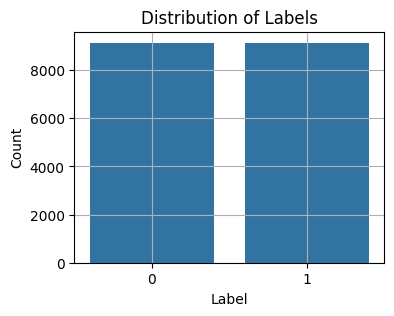

In [71]:
plt.figure(figsize=(4,3))
sns.countplot(x='Label', data=df_eda)
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()


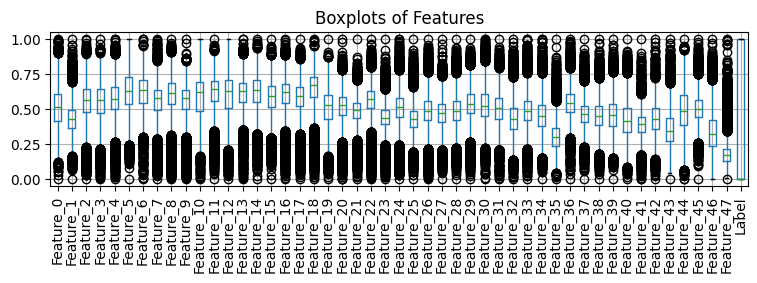

In [37]:
plt.figure(figsize=(9, 2))
df_eda.iloc[:, :].boxplot()
plt.title("Boxplots of Features")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


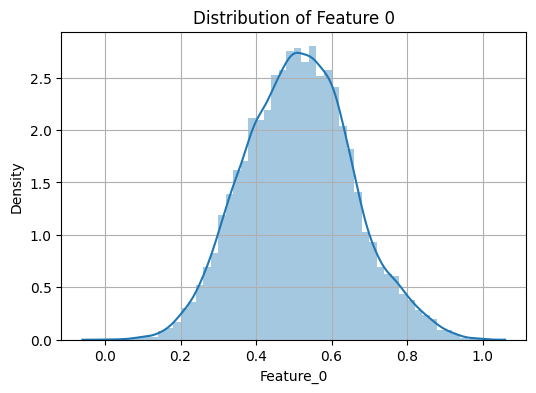

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


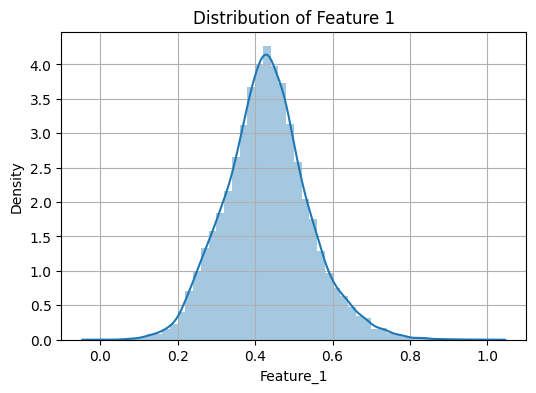

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


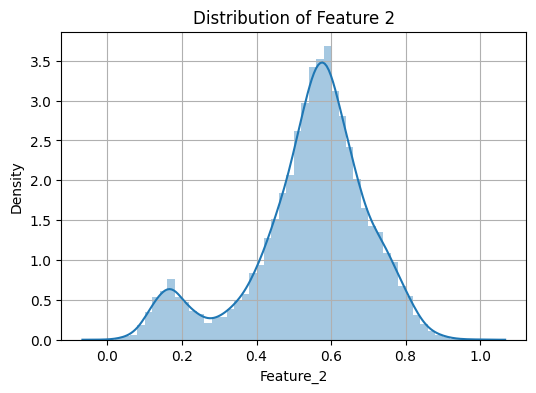

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


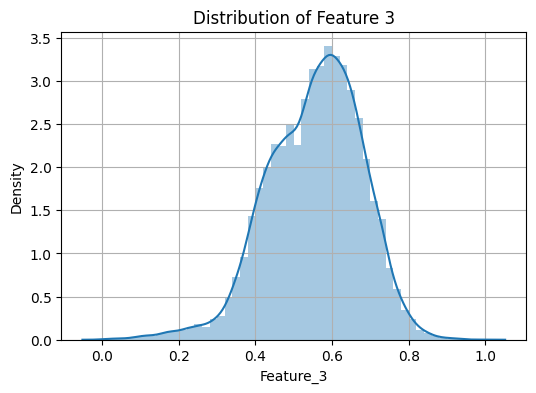

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


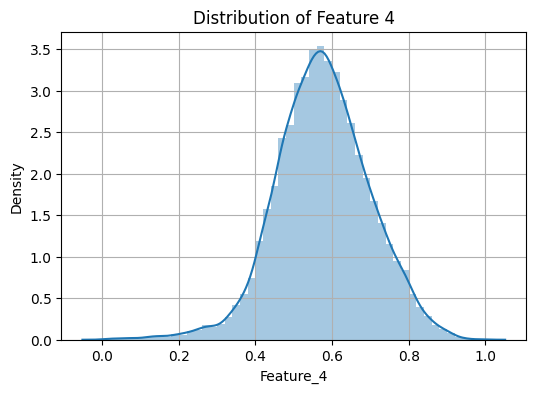

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


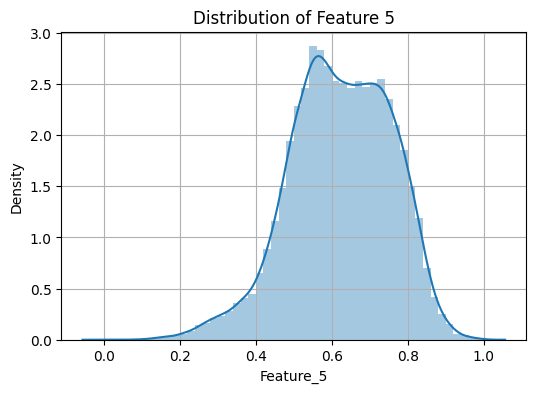

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


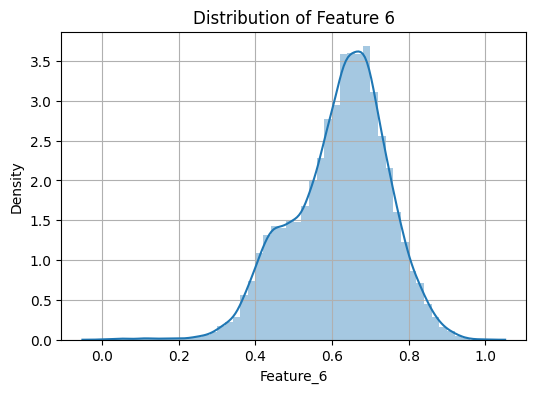

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


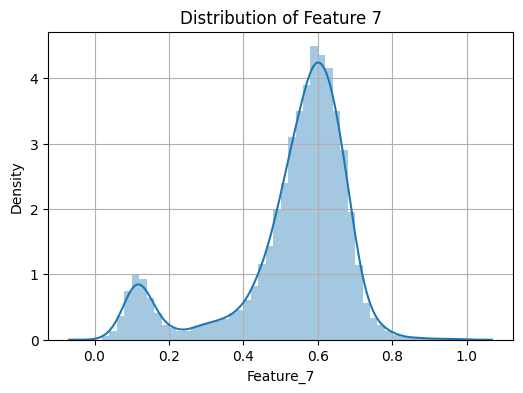

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


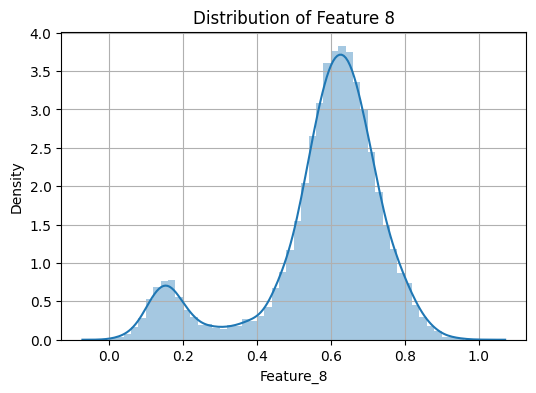

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


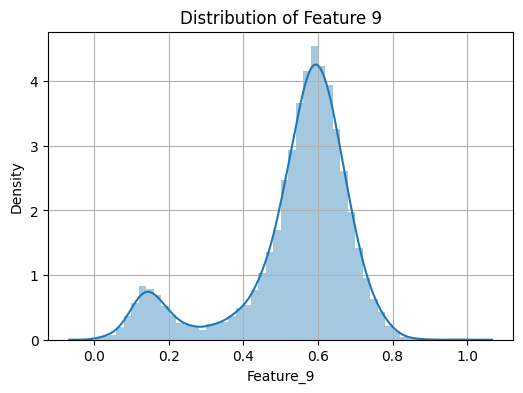

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


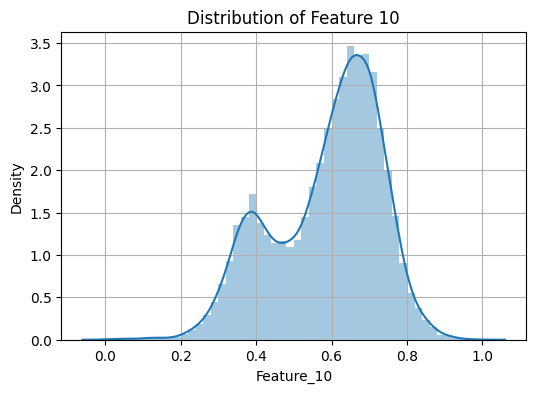

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


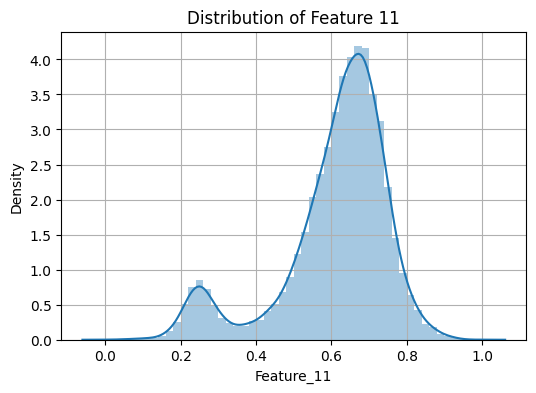

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


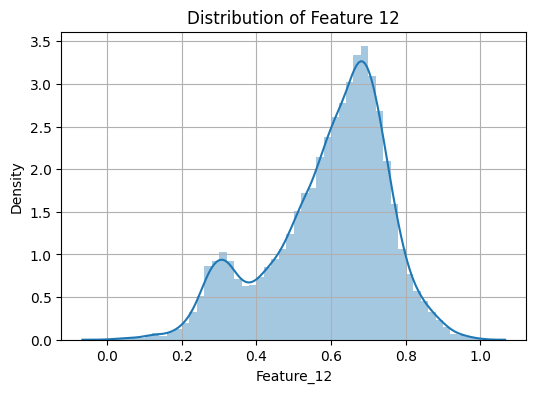

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


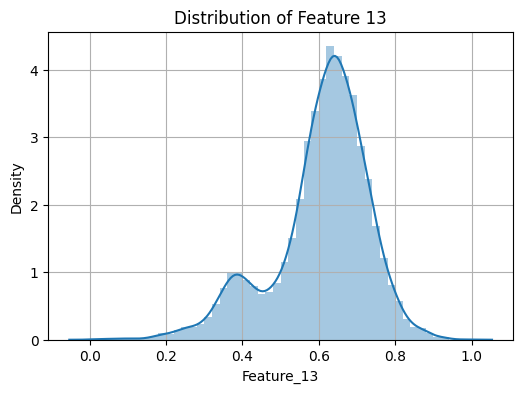

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


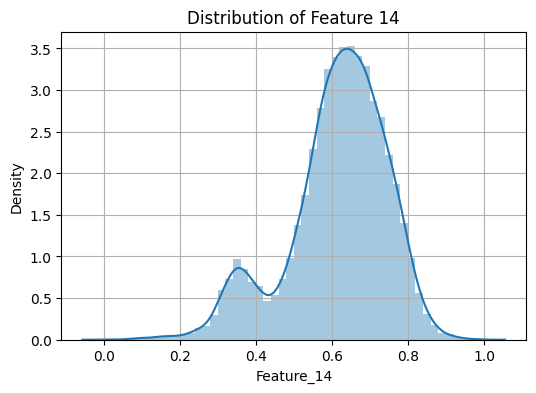

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


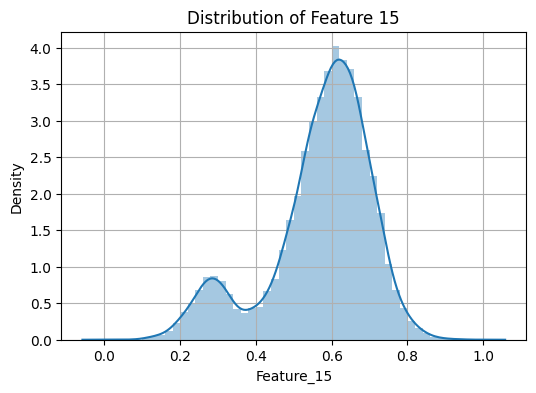

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


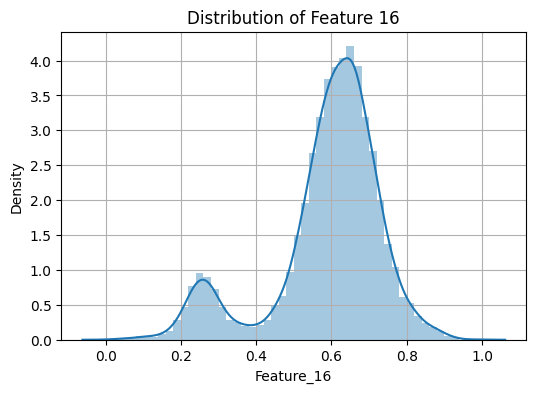

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


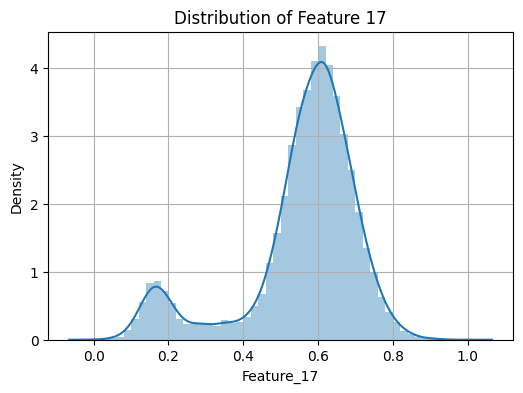

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


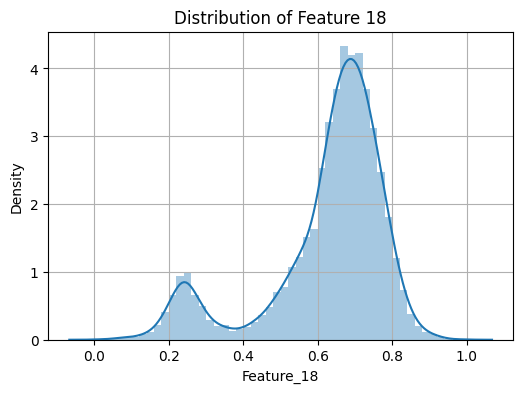

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


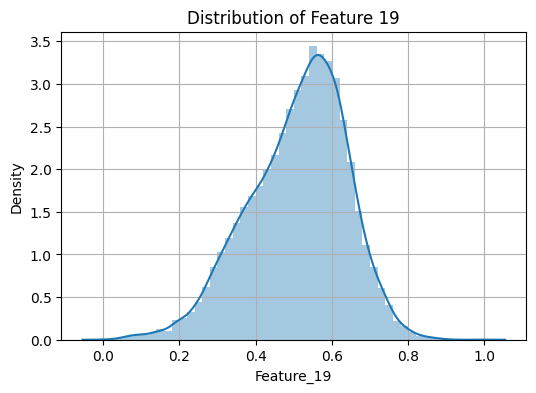

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


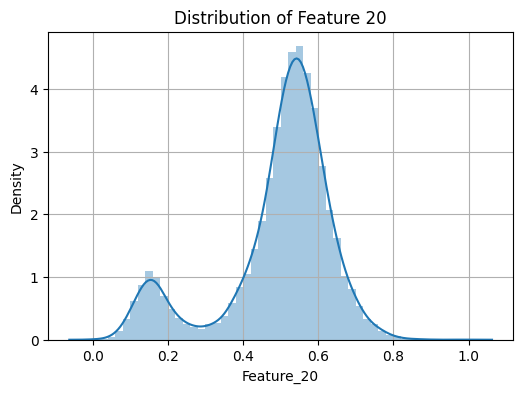

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


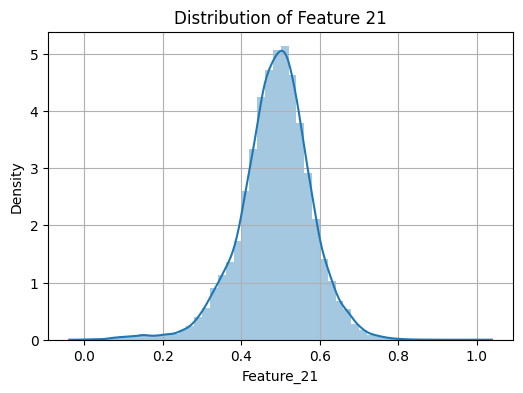

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


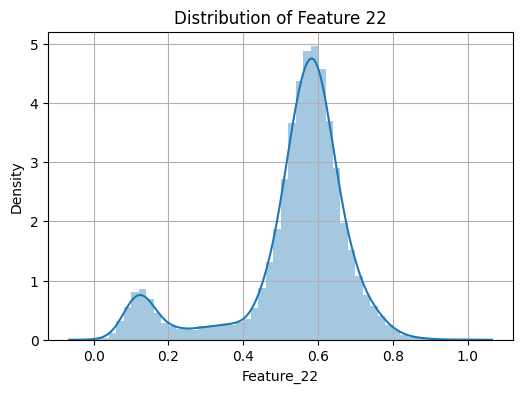

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


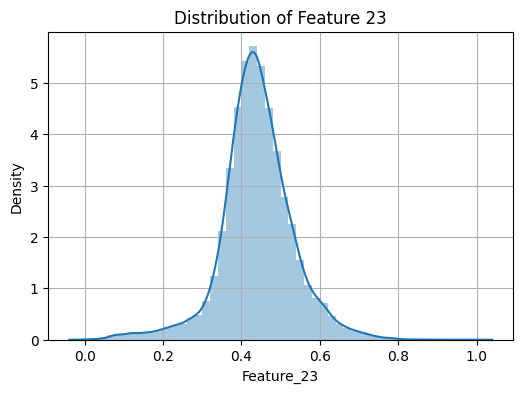

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


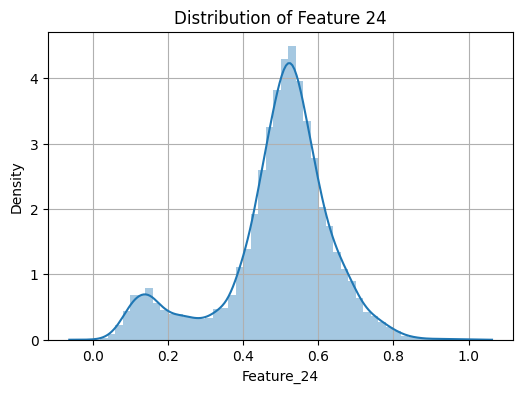

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


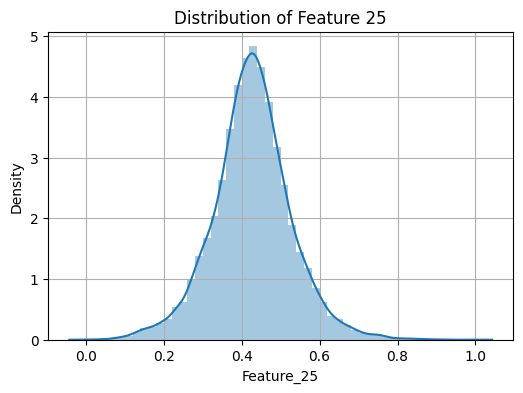

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


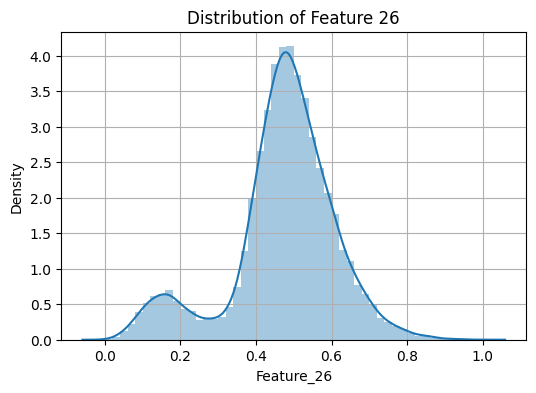

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


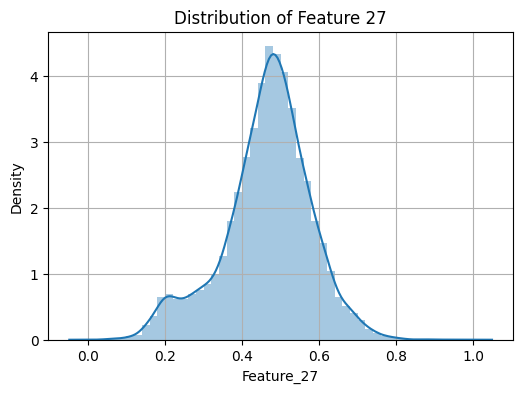

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


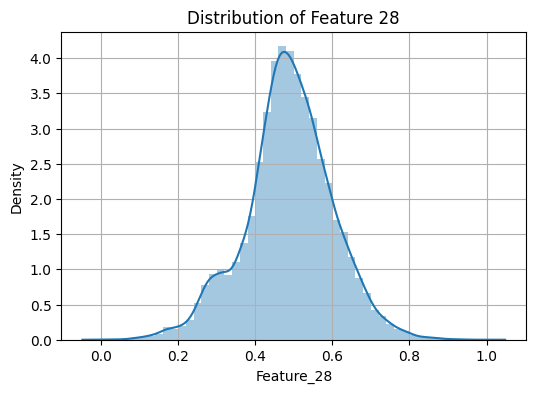

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


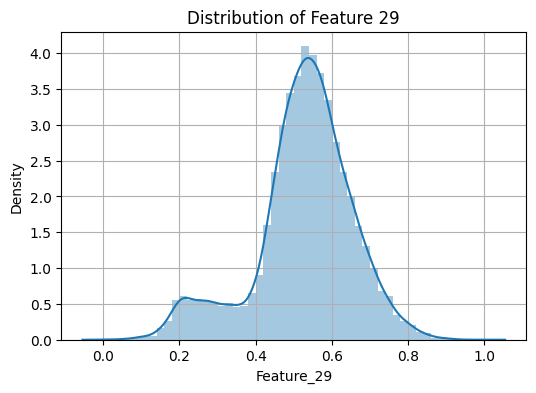

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


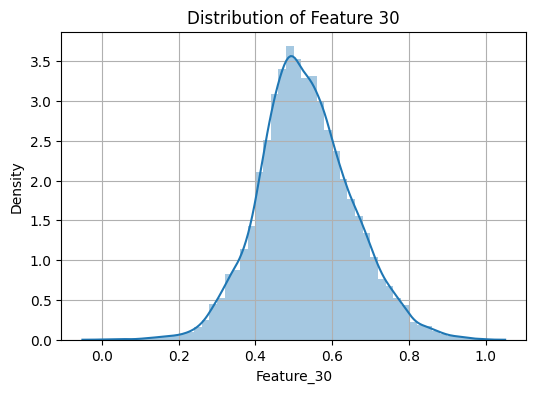

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


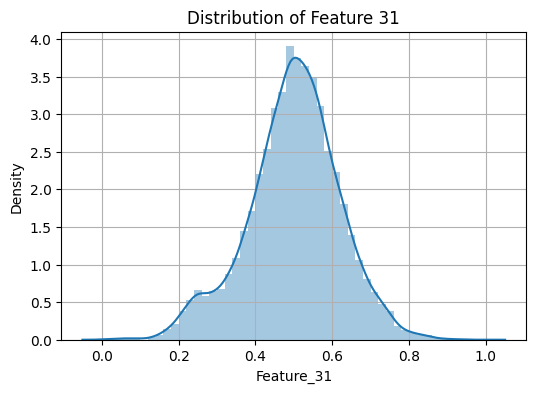

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


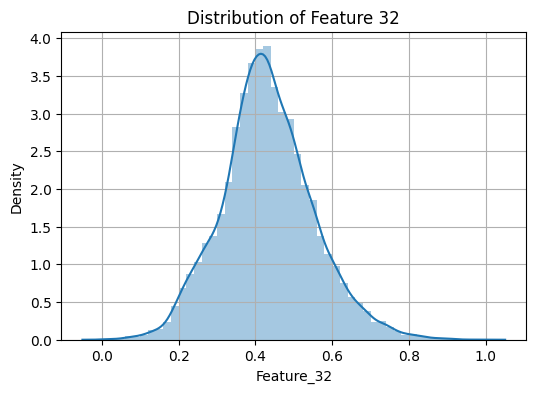

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


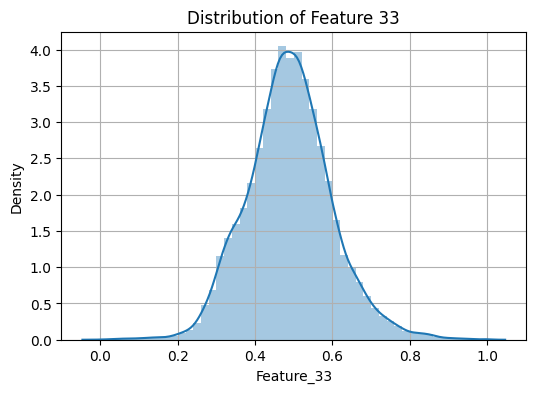

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


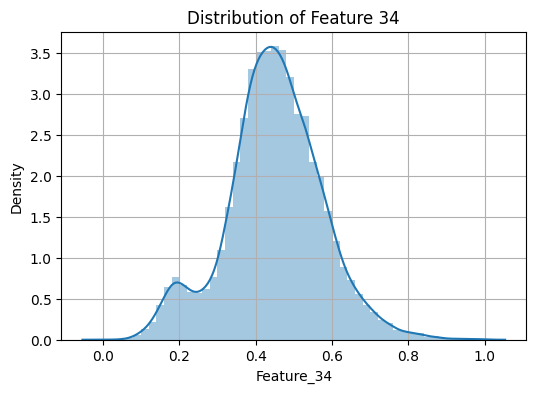

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


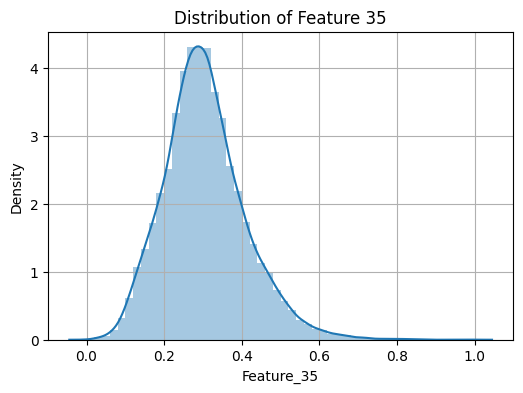

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


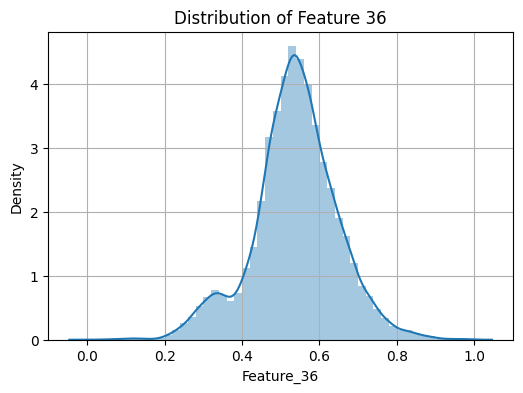

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


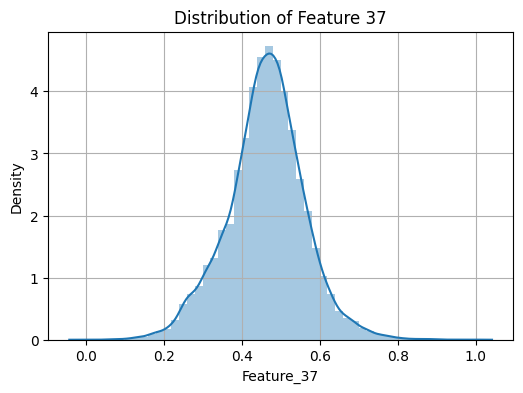

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


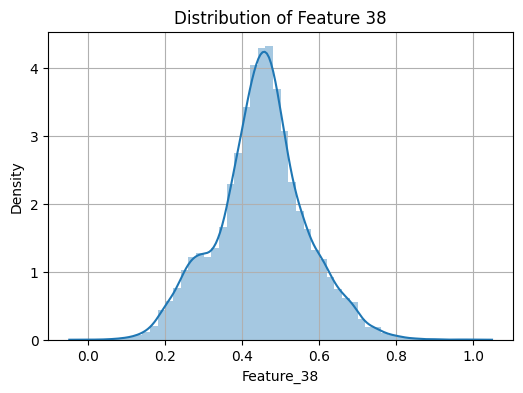

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


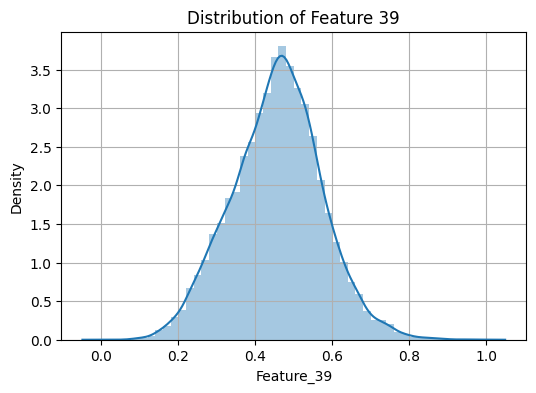

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


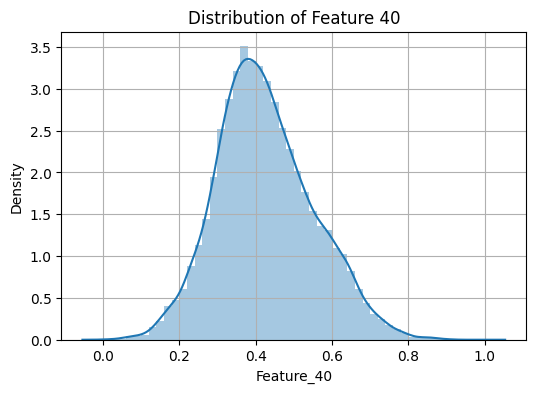

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


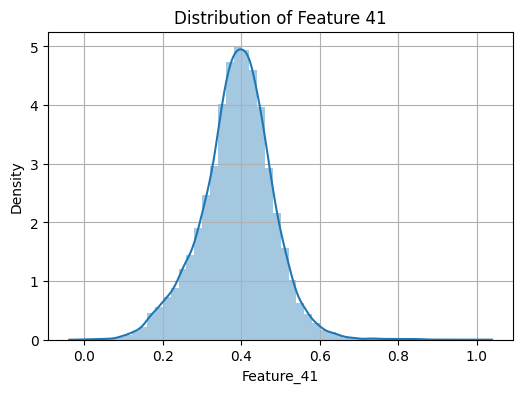

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


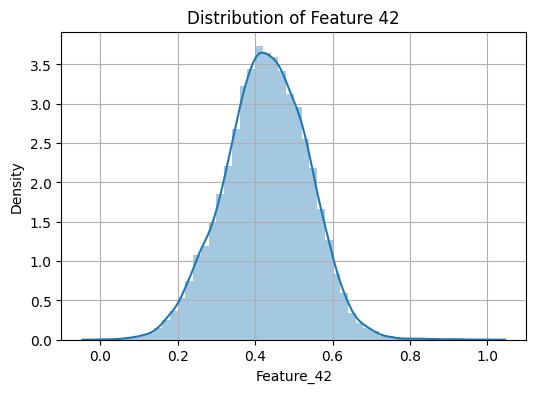

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


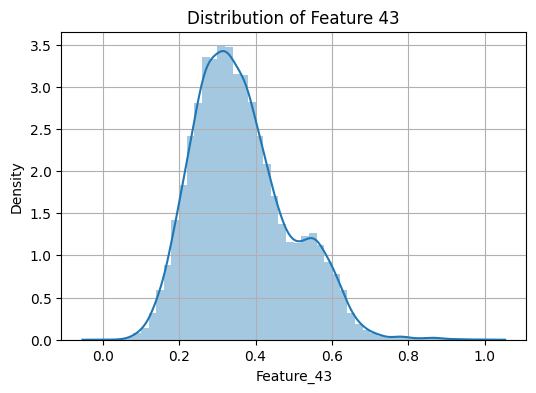

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


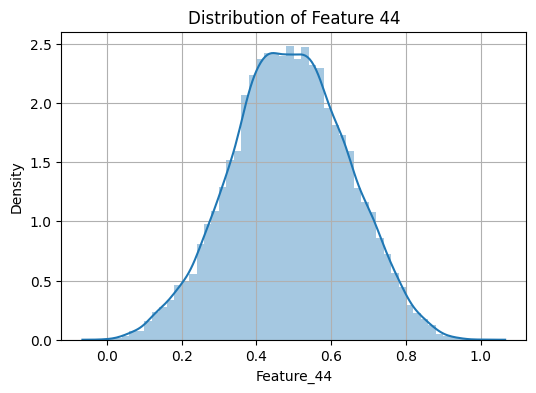

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


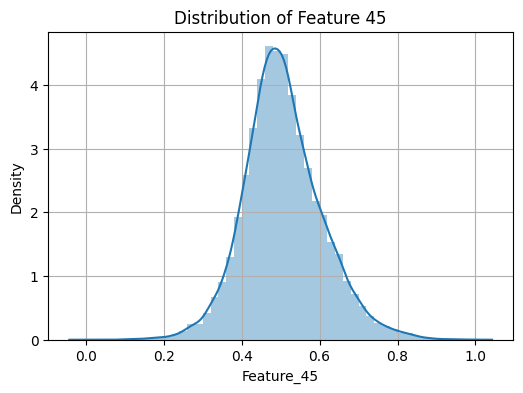

/tmp/ipython-input-2597658568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda.iloc[:, i], kde=True)


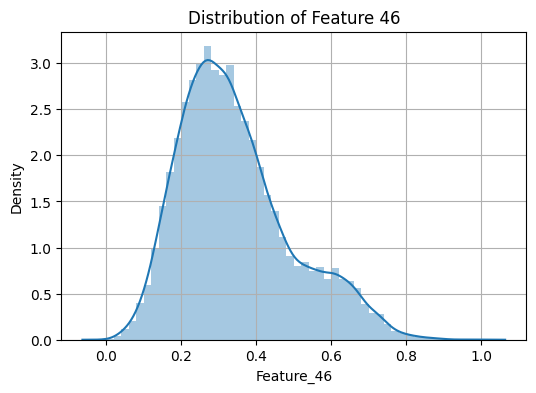

In [38]:
for i in range(47):
  plt.figure(figsize=(6,4))
  sns.distplot(df_eda.iloc[:, i], kde=True)
  plt.title(f"Distribution of Feature {i}")
  plt.grid(True)
  plt.show()

In [39]:
from sklearn.preprocessing import FunctionTransformer
trf=FunctionTransformer(lambda x:x*x)
df_eda1=trf.fit_transform(df_eda.iloc[:,5:23])

In [41]:
df_eda1=pd.DataFrame(df_eda1,columns=df_eda.columns[5:23])
df_eda1.iloc[0:2]

,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22
0,0.795916,0.663757,0.155007,0.282111,0.262519,0.448867,0.333051,0.359810,0.672866,0.397788,0.544795,0.475626,0.443523,0.311587,0.608054,0.268271,0.409078,0.294516
1,0.486481,0.467363,0.452671,0.365607,0.334819,0.337885,0.481128,0.518042,0.522712,0.711578,0.479511,0.521844,0.364776,0.303664,0.426150,0.316114,0.221694,0.387120


/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


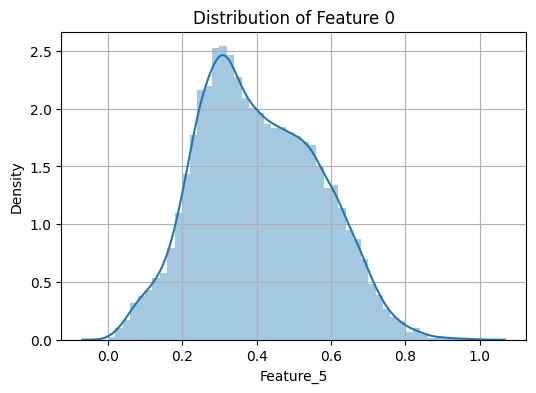

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


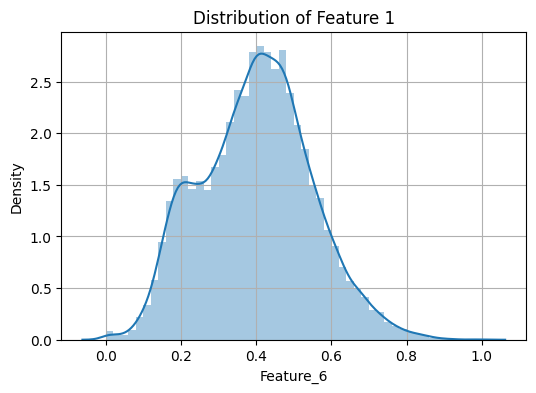

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


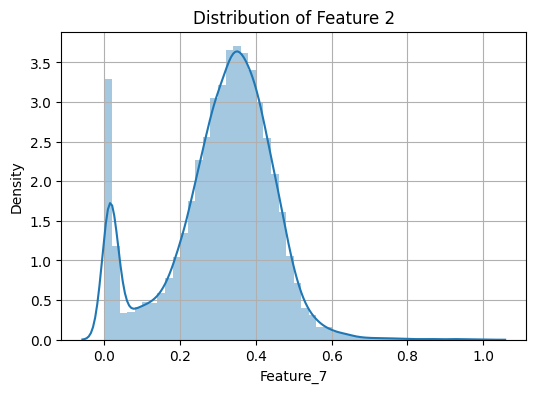

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


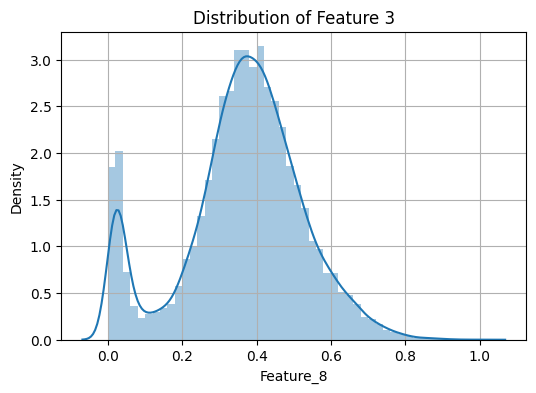

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


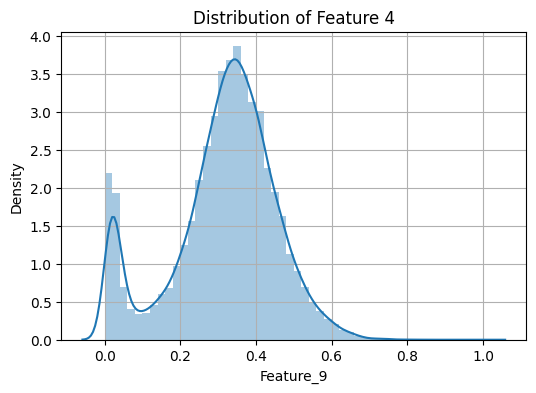

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


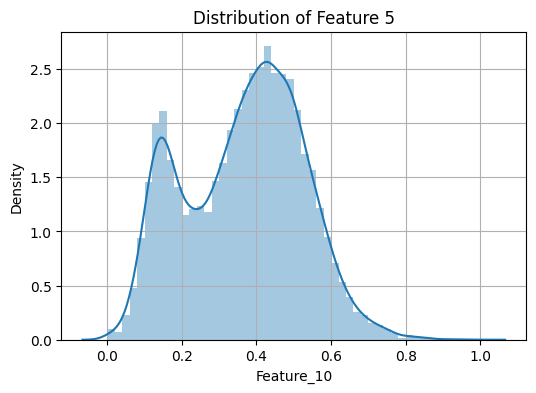

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


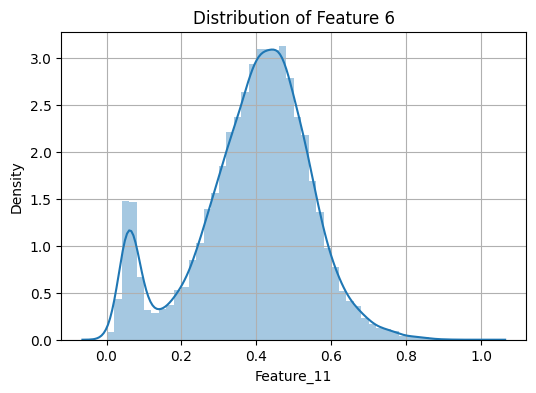

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


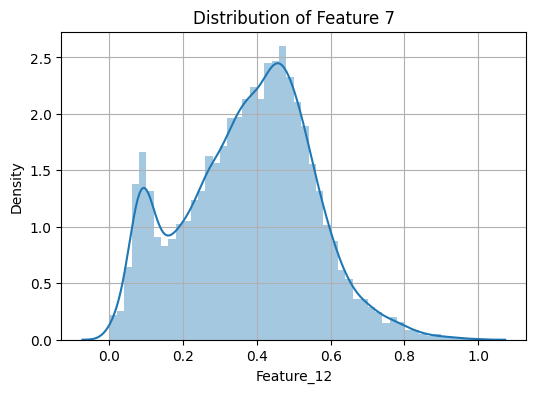

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


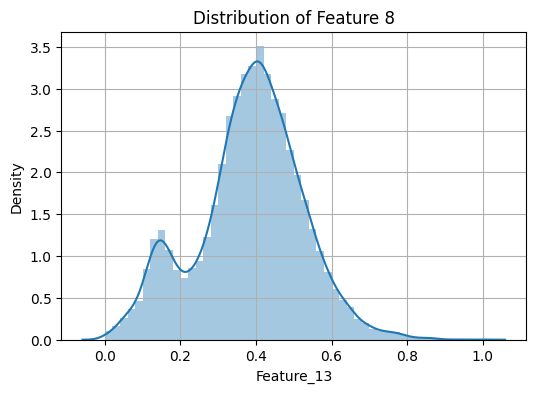

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


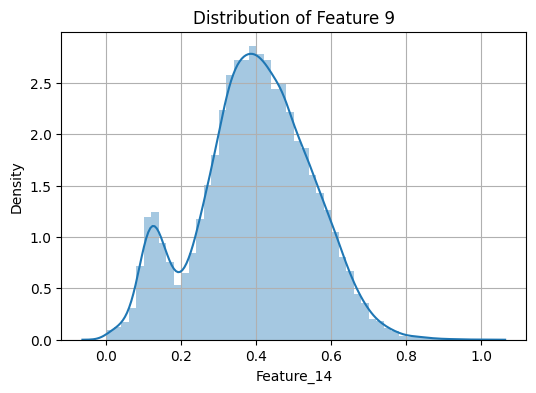

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


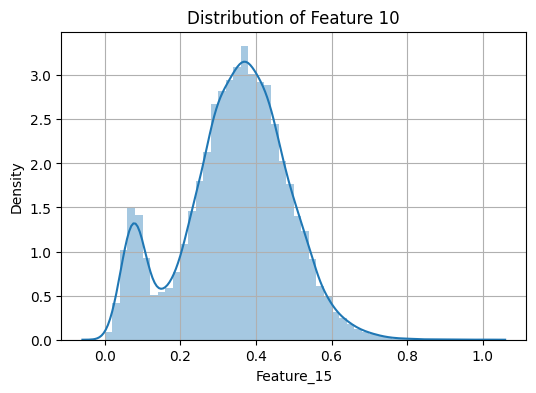

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


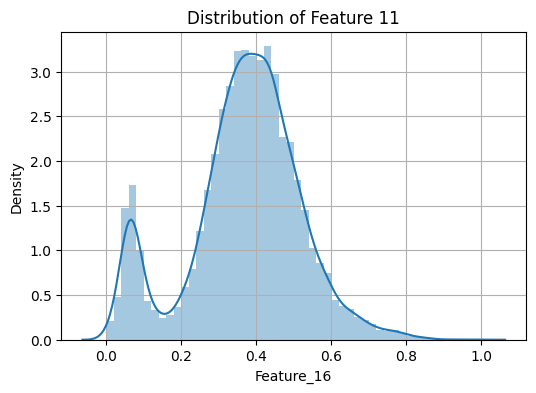

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


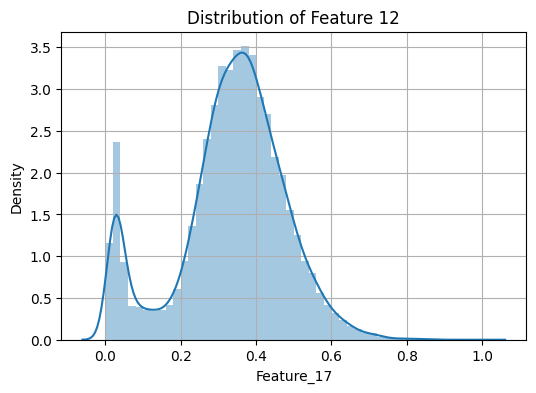

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


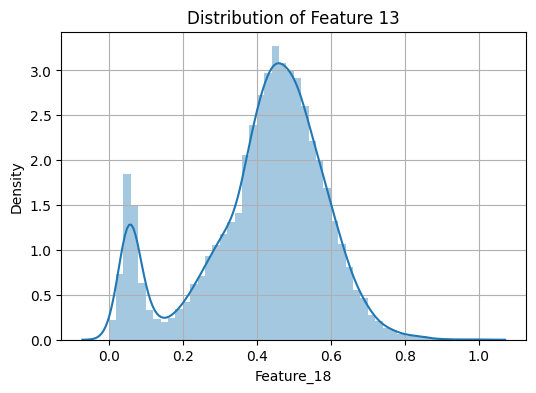

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


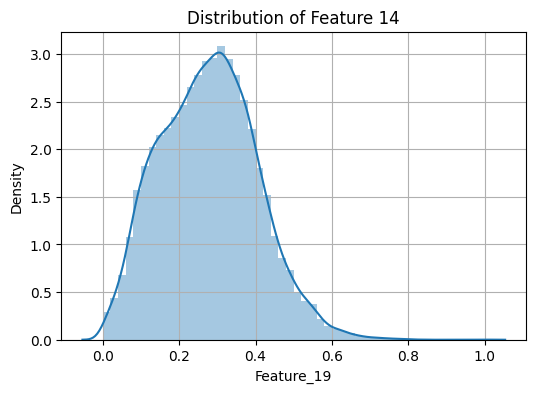

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


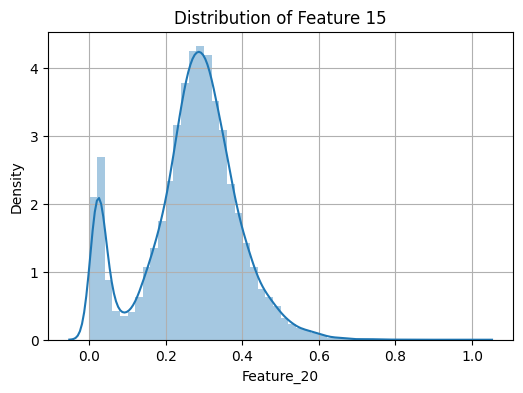

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


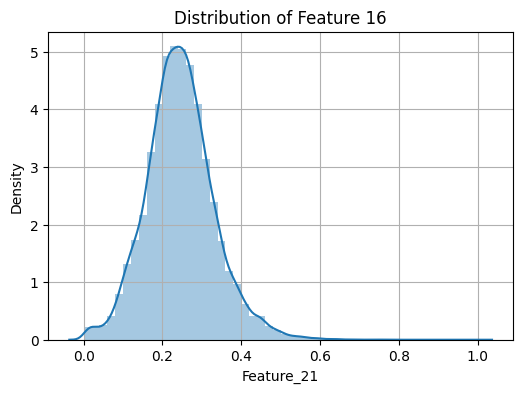

/tmp/ipython-input-1895618843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda1.iloc[:, i], kde=True)


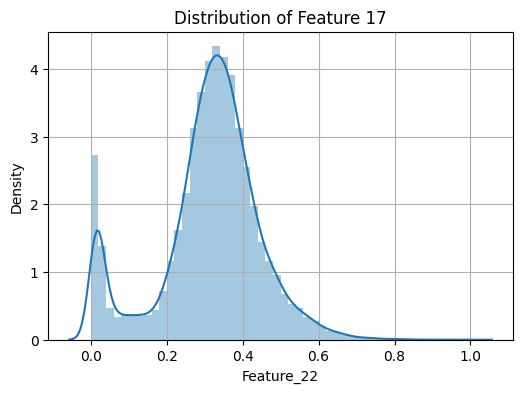

In [42]:
for i in range(df_eda1.shape[1]):
  plt.figure(figsize=(6,4))
  sns.distplot(df_eda1.iloc[:, i], kde=True)
  plt.title(f"Distribution of Feature {i}")
  plt.grid(True)
  plt.show()

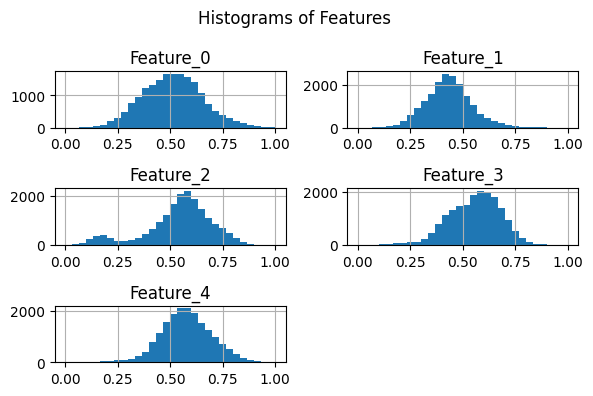

In [44]:
df_eda.iloc[:, :5].hist(figsize=(6,4), bins=30)
plt.suptitle("Histograms of Features")
plt.tight_layout()
plt.show()

In [90]:
X_train[0]

array([0.44756819, 0.42820267, 0.40826436, 0.5718253 , 0.60852158,
       0.89214114, 0.81471274, 0.39370866, 0.53114087, 0.51236643,
       0.66997523, 0.57710532, 0.59984148, 0.82028415, 0.63070435,
       0.73810221, 0.68965672, 0.66597531, 0.5581998 , 0.77977839,
       0.51794864, 0.63959203, 0.54269296, 0.59275446, 0.59506555,
       0.52276465, 0.57428612, 0.52701987, 0.56063185, 0.5583197 ,
       0.54072452, 0.54741071, 0.51348734, 0.4823145 , 0.45541166,
       0.49795625, 0.65162844, 0.61221354, 0.57423642, 0.56898157,
       0.44006865, 0.40513588, 0.48143047, 0.52804393, 0.70041214,
       0.45520559, 0.21407224, 0.13593296])

In [93]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_train)
df_pca = pd.DataFrame(X_pca,)
df_pca['Label'] = y_train
X_test_pca=pca.transform(X_test)

In [92]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47388823, 0.54041927, 0.60035657, 0.63952145, 0.6748716 ,
       0.70646705, 0.73124669, 0.75413577, 0.77555269, 0.79329336,
       0.80981635, 0.82274368, 0.83460946, 0.84569754, 0.85671216,
       0.86710014, 0.87692206, 0.88630602, 0.89412425, 0.90181759,
       0.90902612, 0.91615815, 0.92261727, 0.9290058 , 0.93504984,
       0.94091696, 0.94646103, 0.95165336, 0.95645764, 0.96091782,
       0.96501516, 0.96865089, 0.97206002, 0.97524909, 0.97834921,
       0.98110973, 0.9837478 , 0.98625802, 0.98861813, 0.99080681])

In [103]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)

    print(f"\nEvaluation Metrics for {model_name}:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [105]:
#RandomForest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")


Evaluation Metrics for Random Forest:
Confusion Matrix:
 [[2263   45]
 [  44 2220]]
Accuracy: 0.9805336832895888
Precision: 0.9801324503311258
Recall: 0.980565371024735
F1 Score: 0.9803488628836388


In [106]:
# K-NN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, "K-Nearest Neighbors")



Evaluation Metrics for K-Nearest Neighbors:
Confusion Matrix:
 [[2258   50]
 [   7 2257]]
Accuracy: 0.9875328083989501
Precision: 0.9783268313827481
Recall: 0.9969081272084805
F1 Score: 0.9875300809450887


In [107]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, "Support Vector Machine")


Evaluation Metrics for Support Vector Machine:
Confusion Matrix:
 [[2296   12]
 [   8 2256]]
Accuracy: 0.9956255468066492
Precision: 0.9947089947089947
Recall: 0.9964664310954063
F1 Score: 0.9955869373345102


In [108]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_model(nb, X_test, y_test, "Naive Bayes")


Evaluation Metrics for Naive Bayes:
Confusion Matrix:
 [[1998  310]
 [1193 1071]]
Accuracy: 0.6712598425196851
Precision: 0.775524981897176
Recall: 0.4730565371024735
F1 Score: 0.5876543209876544


In [109]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")


Evaluation Metrics for Decision Tree:
Confusion Matrix:
 [[2121  187]
 [ 157 2107]]
Accuracy: 0.9247594050743657
Precision: 0.9184829991281604
Recall: 0.9306537102473498
F1 Score: 0.9245283018867925


In [110]:
# ANN
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

y_pred_ann = (ann.predict(X_test) > 0.5).astype("int32").flatten()
print("\nEvaluation Metrics for ANN:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann))
print("Recall:", recall_score(y_test, y_pred_ann))
print("F1 Score:", f1_score(y_test, y_pred_ann))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics for ANN:
Confusion Matrix:
 [[2229   79]
 [  17 2247]]
Accuracy: 0.979002624671916
Precision: 0.9660361134995701
Recall: 0.9924911660777385
F1 Score: 0.9790849673202614
